In [1]:
import pandas as pd

eoe_df = pd.read_excel("/content/Final_EOE_Dataset_V2.xlsx")

print(eoe_df.head())


eoe_df.to_csv("eoe_data.csv", index=False)

       !Sample_title      E51      E60     E139     E109     E208     E238  \
0  TC0100006437.hg.1  4.61101  3.93670  4.50632  3.25702  3.43970  3.61398   
1  TC0100006476.hg.1  5.18858  4.69930  4.75295  5.41349  5.41200  5.17729   
2  TC0100006479.hg.1  4.76671  5.07218  4.86237  5.35532  4.81166  4.45512   
3  TC0100006480.hg.1  5.99295  5.03977  5.73988  5.61755  6.01122  5.51166   
4  TC0100006483.hg.1  5.90252  5.70587  6.02649  5.24064  6.29135  4.96404   

      E285     E266     E282  ...     C212     C102     C194     C180  \
0  4.01474  3.94419  4.06883  ...  3.45582  3.42089  3.82201  3.44718   
1  4.97784  4.89836  4.88841  ...  5.22657  5.13776  3.95715  5.21787   
2  5.04126  5.47324  4.94555  ...  5.14163  5.21066  4.48366  4.83351   
3  6.07212  5.24071  6.34674  ...  6.61143  6.54831  7.56805  7.31333   
4  4.99105  5.05505  4.53265  ...  5.14277  4.69743  5.08882  5.53542   

      C200     C169     C160     C280     C276  Extracted Gene Names  
0  3.88868  3.62428  

In [2]:
import pandas as pd

data = pd.read_csv('eoe_data.csv')

data_dropped = data.iloc[:, 1:-1]

transposed_data = data_dropped.T

transposed_data.index = transposed_data.index.str.startswith('E').astype(int)

print(transposed_data)


     0        1        2        3        4        5        6        7      \
1  4.61101  5.18858  4.76671  5.99295  5.90252  6.30593  4.88346  5.18739   
1  3.93670  4.69930  5.07218  5.03977  5.70587  4.94126  4.63002  6.11360   
1  4.50632  4.75295  4.86237  5.73988  6.02649  5.20489  5.16173  6.20032   
1  3.25702  5.41349  5.35532  5.61755  5.24064  6.12718  4.28320  5.67839   
1  3.43970  5.41200  4.81166  6.01122  6.29135  4.24203  6.04386  6.35652   
1  3.61398  5.17729  4.45512  5.51166  4.96404  6.24263  4.72898  5.61296   
1  4.01474  4.97784  5.04126  6.07212  4.99105  5.18019  4.76295  5.79796   
1  3.94419  4.89836  5.47324  5.24071  5.05505  6.05403  5.03961  5.29539   
1  4.06883  4.88841  4.94555  6.34674  4.53265  5.63077  4.74499  5.66557   
1  3.56435  4.94963  5.27088  6.44707  5.28232  5.25272  4.56062  6.52139   
1  3.91653  4.80516  5.16140  5.44060  5.19331  5.88902  4.11135  5.21618   
1  3.58413  4.85533  4.82544  6.68790  4.86229  5.32185  4.70684  5.24996   

In [3]:
import numpy as np


transposed_file_name = 'transposed_data.csv'


np.savetxt(transposed_file_name, transposed_data, delimiter=',', fmt='%s')

print(f"Transposed data has been saved to '{transposed_file_name}'")


Transposed data has been saved to 'transposed_data.csv'


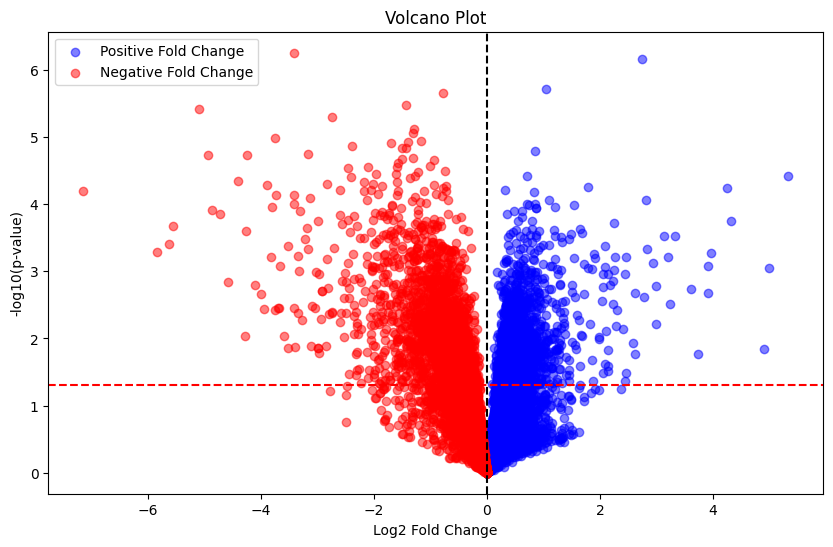

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

gene_expression_data = pd.read_csv('/content/transposed_data.csv', index_col=0)

gene_expression_data = gene_expression_data.T

diseased_samples = gene_expression_data.iloc[:, :12]
normal_samples = gene_expression_data.iloc[:, 12:]

mean_diseased = diseased_samples.mean(axis=1)
mean_normal = normal_samples.mean(axis=1)

fold_change = mean_diseased - mean_normal

p_values = []
for gene in gene_expression_data.index:
    _, p_value = ttest_ind(diseased_samples.loc[gene], normal_samples.loc[gene])
    p_values.append(p_value)

neg_log_p_values = -np.log10(p_values)

fold_change_positive = fold_change[fold_change > 0]
neg_log_p_values_positive = neg_log_p_values[fold_change > 0]
fold_change_negative = fold_change[fold_change < 0]
neg_log_p_values_negative = neg_log_p_values[fold_change < 0]

plt.figure(figsize=(10, 6))
plt.scatter(fold_change_positive, neg_log_p_values_positive, color='blue', alpha=0.5, label='Positive Fold Change')
plt.scatter(fold_change_negative, neg_log_p_values_negative, color='red', alpha=0.5, label='Negative Fold Change')
plt.xlabel('Log2 Fold Change')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1.5)
plt.axhline(y=-np.log10(0.05), color='red', linestyle='--', linewidth=1.5)
plt.legend()
plt.show()


<ipython-input-6-04c57c9bcafb>:68: RuntimeWarning: overflow encountered in exp
  acceptance_prob = np.exp((new_fitness - best_fitness) / temperature)
<ipython-input-6-04c57c9bcafb>:68: RuntimeWarning: overflow encountered in scalar divide
  acceptance_prob = np.exp((new_fitness - best_fitness) / temperature)
<ipython-input-6-04c57c9bcafb>:68: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance_prob = np.exp((new_fitness - best_fitness) / temperature)


Best Solution (Selected Genes): [11022 15864  6766  5637 10402  5847  2670 15000 10677 17875  9010 12335
 17802   688  6925 12360 13766 21014  2450 13773  9419 12619 18177  8101
  3196  6651  6816 20316 12547 15415  4747  7069  2594 18395  3882 11555
  6879  6861 16164  2074]
Best Fitness (Evaluation Score): 195.47966083333333
Most Frequent Indexes between 150,000th and 200,000th iteration: [1552, 6459, 11651, 126, 15618, 12750, 4788, 1555, 17137, 13682, 2098, 7036, 18844, 577, 17930, 5833, 2416, 14496, 11650, 5116, 13565, 13618, 5709, 17894, 2482, 18439, 3848, 1554, 1553, 18980, 19819, 7996, 8982, 11353, 12055, 9242, 19602, 14314, 8650, 13730]


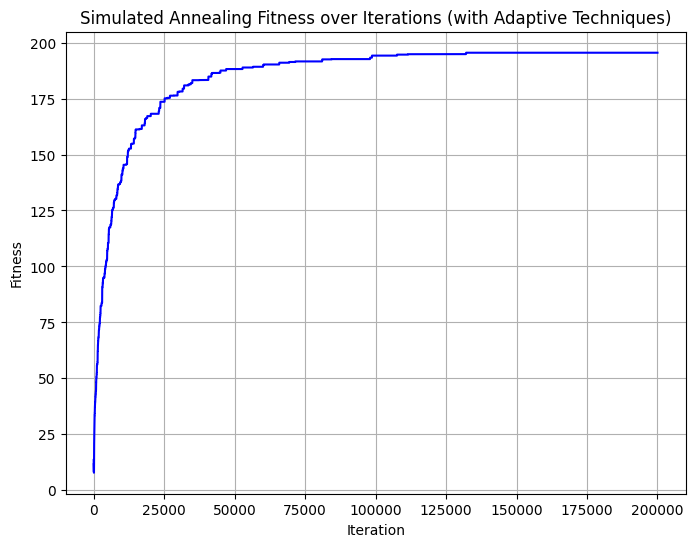

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

gene_expression_data = np.loadtxt('transposed_data.csv', delimiter=',')

import pandas as pd

def evaluate_model(initial_solution, gene_expression_data):
    mean_diffs = []

    for gene_idx in initial_solution:

        selected_gene_data = gene_expression_data[:, gene_idx]


        group_1_values = selected_gene_data[:12]
        group_0_values = selected_gene_data[12:]


        group_1_mean = np.mean(group_1_values)
        group_0_mean = np.mean(group_0_values)


        mean_diff = np.abs(group_1_mean - group_0_mean)


        mean_diffs.append(mean_diff)


    return np.sum(mean_diffs)




def simulated_annealing_adaptive(initial_solution, gene_expression_data, max_iterations=150000, initial_temperature=1000000, cooling_rate=0.80, adaptive_factor=0.9):
    current_solution = initial_solution
    best_solution = current_solution
    best_fitness = evaluate_model(best_solution, gene_expression_data)
    temperature = initial_temperature

    fitness_history = [best_fitness]

    solution_sets = []
    index_frequency = {}

    for i in range(max_iterations):

        new_solution = current_solution.copy()
        idx = np.random.randint(len(new_solution))
        new_gene = np.random.randint(0, gene_expression_data.shape[1])
        while new_gene in new_solution:
            new_gene = np.random.randint(0, gene_expression_data.shape[1])
        new_solution[idx] = new_gene


        new_fitness = evaluate_model(new_solution, gene_expression_data)


        if new_fitness is None:
            continue


        acceptance_prob = np.exp((new_fitness - best_fitness) / temperature)

        if new_fitness > best_fitness or np.random.rand() < acceptance_prob:
            current_solution = new_solution
            best_fitness = new_fitness


        if new_fitness > best_fitness:
            best_solution = current_solution.copy()


        temperature *= cooling_rate


        if i > 0 and i % 100 == 0:
            if fitness_history[-1] <= best_fitness:
                cooling_rate *= adaptive_factor


        fitness_history.append(best_fitness)


        if i >= 150000:
            solution_sets.append(current_solution)
            for index in current_solution:
                if index in index_frequency:
                    index_frequency[index] += 1
                else:
                    index_frequency[index] = 1


    sorted_indexes = sorted(index_frequency.items(), key=lambda x: x[1], reverse=True)


    most_frequent_indexes = [index for index, _ in sorted_indexes[:len(initial_solution)]]

    return best_solution, best_fitness, fitness_history, most_frequent_indexes


n_genes = 21448
n_selected_genes = 40
initial_solution = np.random.choice(np.arange(n_genes), size=n_selected_genes, replace=False)



best_solution, best_fitness, fitness_history, most_frequent_indexes = simulated_annealing_adaptive(initial_solution, gene_expression_data, max_iterations=200000)

print("Best Solution (Selected Genes):", best_solution)
print("Best Fitness (Evaluation Score):", best_fitness)
print("Most Frequent Indexes between 150,000th and 200,000th iteration:", most_frequent_indexes)

plt.figure(figsize=(8, 6))
plt.plot(fitness_history, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Fitness')
plt.title('Simulated Annealing Fitness over Iterations (with Adaptive Techniques)')
plt.grid(True)
plt.show()

Common genes - CRISP2
FAM43B
EXOC3
STAT6
MTHFD2L
ARC
ZFAND4
PPP2R1B

In [ ]:


import pandas as pd


data = pd.read_excel('/content/Final_EOE_Dataset_V2.xlsx')

indices = [11551, 6458, 11650, 125, 15617, 12749, 4787, 1554, 17136,
           13681, 2097, 7035, 18843, 576, 17929, 5832, 2415, 14495,
           11649, 5115, 13564, 13617, 5708, 17893, 2481, 18438, 3847,
           1553, 1552, 18979, 19818, 7995, 8981, 11352, 12054, 9241, 19601, 14313, 8649, 13729]

gene_names = data.loc[indices, 'Extracted Gene Names']

print(gene_names)

11551      HSPA12A
6458         DPCR1
11650       FAM25G
125         FAM43B
15617          IVD
12749      PPP2R1B
4787       MTHFD2L
1554        SPRR2E
17136         GGT6
13681        KRT79
2097          RORC
7035        CRISP2
18843       ZNF562
576           OAZ3
17929     C18orf54
5832         EXOC3
2415         IL36G
14495        TPPP2
11649        ANXA8
5115          CSN2
13564        RECQL
13617        RPAP3
5708       SPINK13
17893        TAF4B
2481         LYPD6
18438       COX6B1
3847          CPB1
1553        SPRR2B
1552        SPRR2D
18979         DMKN
19818      FAM217B
7995          HIP1
8981           ARC
11352       ZFAND4
12054        CCND1
9241          RMI1
19601    LOC388780
14313     CSNK1A1L
8649        ADGRB1
13729        STAT6
Name: Extracted Gene Names, dtype: object
